In [1]:
# Import inpendences
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# read csv file
census_data = pd.read_csv("output_data/combined_data.csv")

## Percentage change group by year

In [3]:
# Sum up all states data by year
yearly_sum = census_data.groupby(['Year']).sum()
del yearly_sum['state']
yearly_sum

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,225882277.0,37574942.0,1365947.0,159410.0,612910.0,804455.0,693090.0,1130410.0,331686.0,848181.0,...,186700.0,183822.0,141161.0,148579.0,1197590.0,1437653.0,170744.0,95529.0,755979.0,211896.0
2010,226897366.0,38833955.0,1338663.0,154342.0,656051.0,765684.0,681009.0,1109732.0,319353.0,830524.0,...,200832.0,202143.0,152087.0,155583.0,1292705.0,1535615.0,169471.0,91445.0,765741.0,209614.0
2011,228376880.0,39519093.0,1321265.0,154977.0,688785.0,747740.0,682846.0,1102869.0,311150.0,851430.0,...,206648.0,204745.0,154558.0,153469.0,1330222.0,1566576.0,168146.0,90976.0,810541.0,207037.0
2012,229781216.0,40160868.0,1323893.0,156136.0,713701.0,733340.0,686676.0,1097187.0,308929.0,865782.0,...,209373.0,210055.0,154021.0,153378.0,1369733.0,1600561.0,168266.0,87951.0,867864.0,210887.0
2013,231294617.0,40750580.0,1308756.0,155582.0,739768.0,709354.0,693975.0,1064162.0,304987.0,879505.0,...,212167.0,214943.0,152649.0,152647.0,1400036.0,1613417.0,166826.0,86406.0,924722.0,212837.0
2014,232900575.0,41351012.0,1293042.0,157943.0,765985.0,689586.0,687312.0,1029625.0,298631.0,889711.0,...,217808.0,220190.0,155002.0,151932.0,1427286.0,1646177.0,166123.0,85014.0,981444.0,211094.0
2015,234352363.0,41895668.0,1283611.0,159695.0,786770.0,663629.0,687642.0,999350.0,296719.0,900904.0,...,216407.0,222805.0,156997.0,148865.0,1451733.0,1675407.0,163169.0,82819.0,1035578.0,212385.0


In [4]:
yearly_sum.to_csv("output_data/yearly_sum.csv",index = True, header=True)

In [6]:
# use pct_change to calculate the change year by year
yearly_change = (yearly_sum.pct_change()*100).round(2)
yearly_change = yearly_change.drop(yearly_change.index[0])
yearly_change

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.45,3.35,-2.00,-3.18,7.04,-4.82,-1.74,-1.83,-3.72,-2.08,...,7.57,9.97,7.74,4.71,7.94,6.81,-0.75,-4.28,1.29,-1.08
2011,0.65,1.76,-1.30,0.41,4.99,-2.34,0.27,-0.62,-2.57,2.52,...,2.90,1.29,1.62,-1.36,2.90,2.02,-0.78,-0.51,5.85,-1.23
2012,0.61,1.62,0.20,0.75,3.62,-1.93,0.56,-0.52,-0.71,1.69,...,1.32,2.59,-0.35,-0.06,2.97,2.17,0.07,-3.33,7.07,1.86
2013,0.66,1.47,-1.14,-0.35,3.65,-3.27,1.06,-3.01,-1.28,1.59,...,1.33,2.33,-0.89,-0.48,2.21,0.80,-0.86,-1.76,6.55,0.92
2014,0.69,1.47,-1.20,1.52,3.54,-2.79,-0.96,-3.25,-2.08,1.16,...,2.66,2.44,1.54,-0.47,1.95,2.03,-0.42,-1.61,6.13,-0.82
2015,0.62,1.32,-0.73,1.11,2.71,-3.76,0.05,-2.94,-0.64,1.26,...,-0.64,1.19,1.29,-2.02,1.71,1.78,-1.78,-2.58,5.52,0.61


In [7]:
yearly_change.to_csv("output_data/yearly_change.csv",index = True, header=True)

## Seperate states into 5 main regions
1. West Coast
2. East Coast
3. Midwest
4. Gulf Coast
5. Rocky Mountain

In [8]:
# Create the list to store states name for regions
west_coast = ["Washington","Oregon","Nevada","California","Alaska","Arizona","Hawaii"]
rocky_mountain = ["Montana","Idaho","Wyoming","Colorado","Utah"]
gulf_coast = ["New Mexico","Texas","Louisiana","Arkansas","Mississippi","Alabama"]
midwest = ["North Dakota","South Dakota","Nebraska","Kansas","Oklahoma",
          "Missouri","Iowa","Minnesota","Wisconsin","Illinois","Michigan",
          "Indiana","Ohio","Kentucky","Tennessee"]
east_coast = ["Maine","Vermont","New Hampshire","Massachusetts","New York","Pennsylvania",
             "Connecticut","New Jersey","Delaware","Maryland","Delaware","Virginia",
             "North Carolina","South Carolina","Georgia","Florida","Rhode Island"]
# seperate the states into west coast
west_coast_df = census_data[census_data["Name"].isin(west_coast)]
west_coast_df = west_coast_df.reset_index()
del west_coast_df["index"]
west_coast_df.head()

,Name,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,...,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew,state,Year
0,Alaska,533451.0,22735.0,1926.0,0.0,177.0,376.0,419.0,3689.0,75.0,...,805.0,780.0,1031.0,12897.0,166.0,88.0,500.0,150.0,2,2009
1,Alaska,534077.0,22447.0,1969.0,0.0,159.0,438.0,469.0,4050.0,105.0,...,909.0,896.0,1103.0,14857.0,107.0,73.0,685.0,182.0,2,2010
2,Alaska,543072.0,22226.0,1892.0,0.0,107.0,486.0,493.0,3779.0,103.0,...,989.0,853.0,1071.0,13750.0,86.0,90.0,530.0,181.0,2,2011
3,Alaska,550553.0,22475.0,2084.0,0.0,154.0,497.0,281.0,3790.0,111.0,...,835.0,1290.0,1303.0,14705.0,172.0,77.0,651.0,162.0,2,2012
4,Alaska,557877.0,22425.0,2195.0,0.0,120.0,444.0,279.0,3662.0,140.0,...,1105.0,1469.0,1286.0,14177.0,133.0,90.0,388.0,241.0,2,2013


In [9]:
west_coast_df.to_csv("output_data/west_coast.csv",index=None,header=True)

In [11]:
# seperate the states into east coast
east_coast_df = census_data[census_data["Name"].isin(east_coast)]
east_coast_df = east_coast_df.reset_index()
del east_coast_df["index"]
east_coast_df.head()

,Name,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,...,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew,state,Year
0,Connecticut,2634487.0,314619.0,37237.0,643.0,10899.0,38282.0,37121.0,11254.0,9210.0,...,1087.0,2565.0,6589.0,7454.0,70.0,2950.0,5648.0,2378.0,9,2009
1,Connecticut,2652446.0,339414.0,38128.0,671.0,12307.0,37918.0,38371.0,11907.0,9552.0,...,1371.0,2656.0,7750.0,8113.0,58.0,2809.0,5735.0,2379.0,9,2010
2,Connecticut,2656735.0,348910.0,36219.0,642.0,12937.0,37553.0,37306.0,12196.0,9407.0,...,1478.0,2823.0,7615.0,7954.0,38.0,3042.0,6891.0,2367.0,9,2011
3,Connecticut,2656382.0,360746.0,35565.0,430.0,13811.0,37151.0,36815.0,12066.0,8794.0,...,1776.0,3229.0,8193.0,8076.0,26.0,3038.0,8394.0,2634.0,9,2012
4,Connecticut,2658925.0,371024.0,34519.0,353.0,14081.0,36571.0,37016.0,11533.0,8670.0,...,1401.0,2981.0,7735.0,8539.0,0.0,2764.0,9271.0,2762.0,9,2013


In [12]:
east_coast_df.to_csv("output_data/east_coast.csv",index=None,header=True)

In [14]:
# seperate the states into rocky mountain
rocky_mountain_df = census_data[census_data["Name"].isin(rocky_mountain)]
rocky_mountain_df = rocky_mountain_df.reset_index()
del rocky_mountain_df["index"]
rocky_mountain_df.head()

,Name,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,...,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew,state,Year
0,Colorado,3743328.0,532705.0,16910.0,138.0,638.0,5695.0,2797.0,28699.0,2610.0,...,2392.0,1812.0,16614.0,7056.0,2509.0,1246.0,7609.0,1961.0,8,2009
1,Colorado,3783688.0,542257.0,16751.0,123.0,466.0,5565.0,2828.0,27415.0,1964.0,...,2421.0,1818.0,18807.0,7261.0,2672.0,1215.0,7825.0,1674.0,8,2010
2,Colorado,3852555.0,546341.0,16652.0,140.0,371.0,5294.0,3024.0,27070.0,2098.0,...,2576.0,1908.0,18707.0,7860.0,2624.0,1221.0,7813.0,1851.0,8,2011
3,Colorado,3912773.0,557825.0,15774.0,120.0,285.0,5409.0,3299.0,26689.0,2130.0,...,2342.0,2288.0,18395.0,7811.0,2975.0,1307.0,8991.0,1867.0,8,2012
4,Colorado,3976875.0,565058.0,16213.0,135.0,382.0,5767.0,3370.0,25675.0,1910.0,...,1950.0,2175.0,20099.0,7293.0,2937.0,1322.0,9692.0,1650.0,8,2013


In [15]:
rocky_mountain_df.to_csv("output_data/rocky_mountain.csv",index=None,header=True)

In [16]:
# seperate the states into Gulf Coast
gulf_coast_df = census_data[census_data["Name"].isin(gulf_coast)]
gulf_coast_df = gulf_coast_df.reset_index()
del gulf_coast_df["index"]
gulf_coast_df.head()

,Name,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,...,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew,state,Year
0,Alabama,4137110.0,113179.0,7678.0,23.0,438.0,1796.0,1294.0,10230.0,1003.0,...,876.0,921.0,5256.0,2141.0,39.0,154.0,4090.0,325.0,1,2009
1,Alabama,4194045.0,137617.0,7736.0,29.0,568.0,1638.0,1293.0,10017.0,967.0,...,757.0,904.0,5716.0,2546.0,45.0,154.0,3889.0,510.0,1,2010
2,Alabama,4219401.0,144390.0,7510.0,9.0,293.0,1821.0,1294.0,10335.0,841.0,...,962.0,726.0,6258.0,2947.0,30.0,135.0,3656.0,593.0,1,2011
3,Alabama,4241429.0,149070.0,7259.0,20.0,338.0,1790.0,1326.0,10069.0,878.0,...,835.0,802.0,6337.0,3025.0,79.0,132.0,3807.0,471.0,1,2012
4,Alabama,4261611.0,151384.0,7379.0,18.0,333.0,1672.0,1374.0,10038.0,918.0,...,828.0,935.0,6839.0,3115.0,96.0,145.0,4560.0,410.0,1,2013


In [14]:
gulf_coast_df.to_csv("output_data/gulf_coast.csv",index=None,header=True)

In [17]:
# seperate the states into Midwest
midwest_df = census_data[census_data["Name"].isin(midwest)]
midwest_df = midwest_df.reset_index()
del midwest_df["index"]
midwest_df.head()

,Name,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,...,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew,state,Year
0,Illinois,9360559.0,1476535.0,35996.0,2350.0,4792.0,43136.0,5812.0,52520.0,38335.0,...,5788.0,4630.0,19372.0,73509.0,99.0,3539.0,43625.0,5898.0,17,2009
1,Illinois,9315206.0,1517245.0,34665.0,1975.0,4745.0,40962.0,6650.0,49662.0,36371.0,...,6209.0,5460.0,19783.0,77002.0,95.0,3405.0,45793.0,5770.0,17,2010
2,Illinois,9324625.0,1545592.0,34943.0,1830.0,4820.0,41374.0,6565.0,47876.0,34835.0,...,6868.0,5301.0,20998.0,77727.0,107.0,3031.0,49893.0,6579.0,17,2011
3,Illinois,9329971.0,1561322.0,35159.0,1869.0,5261.0,40018.0,6895.0,47381.0,33322.0,...,6781.0,4316.0,21001.0,77739.0,72.0,3062.0,51497.0,6325.0,17,2012
4,Illinois,9342837.0,1570809.0,35613.0,1372.0,4727.0,40223.0,6699.0,45782.0,33302.0,...,7266.0,3931.0,20907.0,80655.0,53.0,2928.0,56524.0,6666.0,17,2013


In [18]:
midwest_df.to_csv("output_data/midwest.csv",index=None,header=True)

## Sum the states values by year and find the growth rate

In [19]:
sum_east = east_coast_df.groupby(['Year']).sum()
del sum_east['state']
sum_east

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,83972253.0,10310413.0,718155.0,146135.0,579233.0,567931.0,541825.0,389580.0,209986.0,460243.0,...,63286.0,15834.0,42536.0,31593.0,282832.0,323930.0,1002.0,49186.0,296646.0,137501.0
2010,84113363.0,10951960.0,701677.0,141989.0,620745.0,537271.0,528221.0,382085.0,201703.0,440862.0,...,68909.0,16351.0,45566.0,33413.0,308480.0,345300.0,1035.0,46795.0,294895.0,136656.0
2011,84555737.0,11206223.0,690979.0,143220.0,653320.0,520367.0,527651.0,382069.0,197560.0,449402.0,...,69115.0,17203.0,47997.0,34019.0,318311.0,352048.0,1228.0,47808.0,313450.0,131785.0
2012,85007316.0,11453240.0,693806.0,145248.0,676262.0,507729.0,525310.0,380991.0,197142.0,457936.0,...,71002.0,17129.0,49450.0,36059.0,329263.0,360752.0,1184.0,45007.0,339202.0,132804.0
2013,85489209.0,11682207.0,684472.0,146376.0,700434.0,488533.0,526418.0,368411.0,194674.0,461979.0,...,70128.0,17182.0,47354.0,33999.0,330572.0,364571.0,1248.0,44330.0,356293.0,132759.0
2014,85989885.0,11944938.0,677902.0,148403.0,723668.0,474906.0,517164.0,357440.0,190766.0,467111.0,...,72446.0,18188.0,47697.0,35490.0,337444.0,371816.0,975.0,44197.0,377912.0,131059.0
2015,86440893.0,12179567.0,676658.0,150853.0,743996.0,456832.0,513512.0,343427.0,188699.0,477445.0,...,73115.0,18364.0,48223.0,32782.0,343150.0,378462.0,1079.0,42915.0,398939.0,132945.0


In [20]:
change_east = (sum_east.pct_change()*100).round(2)
change_east = change_east.drop(change_east.index[0])
change_east

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.17,6.22,-2.29,-2.84,7.17,-5.40,-2.51,-1.92,-3.94,-4.21,...,8.89,3.27,7.12,5.76,9.07,6.60,3.29,-4.86,-0.59,-0.61
2011,0.53,2.32,-1.52,0.87,5.25,-3.15,-0.11,-0.00,-2.05,1.94,...,0.30,5.21,5.34,1.81,3.19,1.95,18.65,2.16,6.29,-3.56
2012,0.53,2.20,0.41,1.42,3.51,-2.43,-0.44,-0.28,-0.21,1.90,...,2.73,-0.43,3.03,6.00,3.44,2.47,-3.58,-5.86,8.22,0.77
2013,0.57,2.00,-1.35,0.78,3.57,-3.78,0.21,-3.30,-1.25,0.88,...,-1.23,0.31,-4.24,-5.71,0.40,1.06,5.41,-1.50,5.04,-0.03
2014,0.59,2.25,-0.96,1.38,3.32,-2.79,-1.76,-2.98,-2.01,1.11,...,3.31,5.85,0.72,4.39,2.08,1.99,-21.88,-0.30,6.07,-1.28
2015,0.52,1.96,-0.18,1.65,2.81,-3.81,-0.71,-3.92,-1.08,2.21,...,0.92,0.97,1.10,-7.63,1.69,1.79,10.67,-2.90,5.56,1.44


In [21]:
sum_west = west_coast_df.groupby(['Year']).sum()
del sum_west['state']
sum_west

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,34788849.0,11954786.0,190933.0,6137.0,8028.0,91638.0,90579.0,209773.0,33028.0,227354.0,...,87274.0,68095.0,58835.0,52966.0,559016.0,889116.0,91628.0,21126.0,159683.0,46771.0
2010,34946042.0,12215090.0,187299.0,5969.0,8801.0,89491.0,89716.0,205226.0,33010.0,228067.0,...,94193.0,75631.0,64360.0,53434.0,598077.0,953740.0,89757.0,20070.0,166298.0,45763.0
2011,35240808.0,12392002.0,187331.0,5664.0,8722.0,88396.0,88968.0,202229.0,32600.0,234542.0,...,97954.0,76583.0,63234.0,54275.0,611365.0,968353.0,88931.0,19416.0,175885.0,47332.0
2012,35514985.0,12565548.0,191924.0,5041.0,8670.0,88019.0,93348.0,201951.0,32514.0,239520.0,...,100875.0,80627.0,62966.0,53276.0,631001.0,988825.0,88046.0,19170.0,185121.0,49146.0
2013,35808589.0,12742916.0,191509.0,4475.0,9776.0,85855.0,96249.0,197572.0,32408.0,247471.0,...,103748.0,83127.0,64617.0,53996.0,647471.0,990537.0,87022.0,19025.0,197718.0,50560.0
2014,36185755.0,12910403.0,190756.0,4649.0,10581.0,84104.0,95028.0,191034.0,32593.0,252447.0,...,104583.0,82622.0,66993.0,52732.0,661131.0,1008039.0,87415.0,18224.0,207246.0,50640.0
2015,36516001.0,13076716.0,193034.0,4229.0,9994.0,81014.0,95925.0,189609.0,33730.0,253718.0,...,102670.0,81756.0,66843.0,54448.0,666489.0,1024510.0,86025.0,17548.0,219611.0,50777.0


In [22]:
change_west = (sum_west.pct_change()*100).round(2)
change_west = change_west.drop(change_west.index[0])
change_west

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.45,2.18,-1.90,-2.74,9.63,-2.34,-0.95,-2.17,-0.05,0.31,...,7.93,11.07,9.39,0.88,6.99,7.27,-2.04,-5.00,4.14,-2.16
2011,0.84,1.45,0.02,-5.11,-0.90,-1.22,-0.83,-1.46,-1.24,2.84,...,3.99,1.26,-1.75,1.57,2.22,1.53,-0.92,-3.26,5.76,3.43
2012,0.78,1.40,2.45,-11.00,-0.60,-0.43,4.92,-0.14,-0.26,2.12,...,2.98,5.28,-0.42,-1.84,3.21,2.11,-1.00,-1.27,5.25,3.83
2013,0.83,1.41,-0.22,-11.23,12.76,-2.46,3.11,-2.17,-0.33,3.32,...,2.85,3.10,2.62,1.35,2.61,0.17,-1.16,-0.76,6.80,2.88
2014,1.05,1.31,-0.39,3.89,8.23,-2.04,-1.27,-3.31,0.57,2.01,...,0.80,-0.61,3.68,-2.34,2.11,1.77,0.45,-4.21,4.82,0.16
2015,0.91,1.29,1.19,-9.03,-5.55,-3.67,0.94,-0.75,3.49,0.50,...,-1.83,-1.05,-0.22,3.25,0.81,1.63,-1.59,-3.71,5.97,0.27


In [23]:
sum_rocky = rocky_mountain_df.groupby(['Year']).sum()
del sum_rocky['state']
sum_rocky

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,8353541.0,883083.0,31264.0,170.0,1048.0,10699.0,12309.0,54111.0,4976.0,21059.0,...,3648.0,3815.0,4485.0,4305.0,24079.0,13434.0,12957.0,1910.0,10526.0,2379.0
2010,8454799.0,910778.0,31076.0,141.0,950.0,10385.0,12083.0,52502.0,3993.0,21378.0,...,3712.0,3912.0,4640.0,4104.0,25565.0,13659.0,12496.0,1859.0,10179.0,2121.0
2011,8603249.0,924635.0,30255.0,162.0,843.0,10530.0,12405.0,51648.0,3956.0,21984.0,...,3941.0,3281.0,4781.0,4156.0,25899.0,14988.0,12160.0,1845.0,10638.0,2311.0
2012,8731019.0,951505.0,29157.0,140.0,786.0,10347.0,12496.0,50216.0,3961.0,21985.0,...,3895.0,3043.0,4283.0,4545.0,25528.0,15134.0,12454.0,1695.0,12182.0,2240.0
2013,8868043.0,965021.0,29484.0,193.0,913.0,10366.0,12726.0,47936.0,3594.0,22079.0,...,4155.0,3487.0,3845.0,4369.0,27796.0,14899.0,11604.0,1877.0,13986.0,2112.0
2014,8992385.0,989607.0,30055.0,231.0,1168.0,9628.0,12488.0,46053.0,3331.0,22226.0,...,4243.0,3514.0,3907.0,4378.0,28236.0,14740.0,11757.0,1984.0,14974.0,2516.0
2015,9125715.0,1007629.0,29547.0,241.0,1167.0,9651.0,12958.0,45346.0,3486.0,22613.0,...,3456.0,3436.0,4610.0,4907.0,28356.0,15482.0,10352.0,1926.0,16727.0,2323.0


In [24]:
change_rocky = (sum_rocky.pct_change()*100).round(2)
change_rocky = change_rocky.drop(change_rocky.index[0])
change_rocky

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,1.21,3.14,-0.60,-17.06,-9.35,-2.93,-1.84,-2.97,-19.75,1.51,...,1.75,2.54,3.46,-4.67,6.17,1.67,-3.56,-2.67,-3.30,-10.84
2011,1.76,1.52,-2.64,14.89,-11.26,1.40,2.66,-1.63,-0.93,2.83,...,6.17,-16.13,3.04,1.27,1.31,9.73,-2.69,-0.75,4.51,8.96
2012,1.49,2.91,-3.63,-13.58,-6.76,-1.74,0.73,-2.77,0.13,0.00,...,-1.17,-7.25,-10.42,9.36,-1.43,0.97,2.42,-8.13,14.51,-3.07
2013,1.57,1.42,1.12,37.86,16.16,0.18,1.84,-4.54,-9.27,0.43,...,6.68,14.59,-10.23,-3.87,8.88,-1.55,-6.83,10.74,14.81,-5.71
2014,1.40,2.55,1.94,19.69,27.93,-7.12,-1.87,-3.93,-7.32,0.67,...,2.12,0.77,1.61,0.21,1.58,-1.07,1.32,5.70,7.06,19.13
2015,1.48,1.82,-1.69,4.33,-0.09,0.24,3.76,-1.54,4.65,1.74,...,-18.55,-2.22,17.99,12.08,0.42,5.03,-11.95,-2.92,11.71,-7.67


In [25]:
sum_gulf = gulf_coast_df.groupby(['Year']).sum()
del sum_gulf['state']
sum_gulf

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,28631816.0,7232030.0,219760.0,772.0,11398.0,20779.0,20068.0,103534.0,9962.0,21776.0,...,10577.0,2343.0,13020.0,17985.0,195329.0,69614.0,63952.0,3172.0,62278.0,6451.0
2010,29023866.0,7547933.0,217521.0,714.0,11427.0,19371.0,21589.0,103487.0,8924.0,22245.0,...,11370.0,2904.0,13408.0,19366.0,218335.0,75954.0,64890.0,3186.0,63462.0,6644.0
2011,29386644.0,7731385.0,212220.0,703.0,11538.0,19557.0,23030.0,102482.0,8192.0,24248.0,...,11796.0,2611.0,13740.0,18381.0,227921.0,80258.0,64379.0,3619.0,63567.0,6521.0
2012,29715972.0,7895573.0,206956.0,680.0,12210.0,20565.0,24477.0,104665.0,8334.0,25571.0,...,11337.0,2391.0,12607.0,18087.0,233575.0,84401.0,65036.0,4045.0,70362.0,6831.0
2013,30056666.0,8047079.0,203699.0,471.0,13428.0,19090.0,26528.0,100875.0,8743.0,26057.0,...,11794.0,2656.0,12293.0,18122.0,242140.0,88313.0,65222.0,3851.0,73561.0,6994.0
2014,30391179.0,8198639.0,200134.0,490.0,14585.0,19593.0,28618.0,98255.0,8809.0,27368.0,...,12396.0,2346.0,13099.0,18131.0,247688.0,91378.0,64341.0,3908.0,78333.0,7118.0
2015,30720059.0,8320544.0,194295.0,593.0,15529.0,19257.0,30058.0,96014.0,8958.0,28327.0,...,12380.0,2637.0,13679.0,16837.0,254706.0,94773.0,64053.0,3974.0,83338.0,7438.0


In [26]:
change_gulf = (sum_gulf.pct_change()*100).round(2)
change_gulf = change_gulf.drop(change_gulf.index[0])
change_gulf

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,1.37,4.37,-1.02,-7.51,0.25,-6.78,7.58,-0.05,-10.42,2.15,...,7.50,23.94,2.98,7.68,11.78,9.11,1.47,0.44,1.90,2.99
2011,1.25,2.43,-2.44,-1.54,0.97,0.96,6.67,-0.97,-8.20,9.00,...,3.75,-10.09,2.48,-5.09,4.39,5.67,-0.79,13.59,0.17,-1.85
2012,1.12,2.12,-2.48,-3.27,5.82,5.15,6.28,2.13,1.73,5.46,...,-3.89,-8.43,-8.25,-1.60,2.48,5.16,1.02,11.77,10.69,4.75
2013,1.15,1.92,-1.57,-30.74,9.98,-7.17,8.38,-3.62,4.91,1.90,...,4.03,11.08,-2.49,0.19,3.67,4.64,0.29,-4.80,4.55,2.39
2014,1.11,1.88,-1.75,4.03,8.62,2.63,7.88,-2.60,0.75,5.03,...,5.10,-11.67,6.56,0.05,2.29,3.47,-1.35,1.48,6.49,1.77
2015,1.08,1.49,-2.92,21.02,6.47,-1.71,5.03,-2.28,1.69,3.50,...,-0.13,12.40,4.43,-7.14,2.83,3.72,-0.45,1.69,6.39,4.50


In [27]:
sum_midwest = midwest_df.groupby(['Year']).sum()
del sum_midwest['state']
sum_midwest

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2009,67823592.0,3618323.0,193775.0,6082.0,12313.0,110087.0,26294.0,368277.0,72927.0,116061.0,...,21852.0,93735.0,21662.0,41714.0,134682.0,138664.0,1180.0,19792.0,224003.0,18258.0
2010,68032075.0,3786820.0,189046.0,5417.0,13154.0,106014.0,27263.0,361283.0,70833.0,116240.0,...,22585.0,103345.0,23311.0,45245.0,140403.0,144614.0,1251.0,19226.0,227616.0,17760.0
2011,68249213.0,3859298.0,188361.0,5103.0,13448.0,105564.0,28538.0,358503.0,68021.0,118896.0,...,23792.0,105011.0,24094.0,42585.0,144742.0,148809.0,1448.0,17938.0,243529.0,18370.0
2012,68455822.0,3912062.0,190082.0,4953.0,15092.0,103351.0,28954.0,353060.0,66018.0,118432.0,...,22218.0,106812.0,23864.0,41325.0,148416.0,148898.0,1546.0,17670.0,257220.0,19082.0
2013,68701705.0,3958636.0,186944.0,4060.0,14726.0,101983.0,29710.0,343465.0,64446.0,119193.0,...,22273.0,108437.0,23685.0,42047.0,149921.0,152503.0,1719.0,16869.0,279350.0,19567.0
2014,68958444.0,3989684.0,181199.0,4151.0,15316.0,97586.0,31350.0,330668.0,61893.0,117786.0,...,24074.0,113478.0,22575.0,41107.0,150904.0,157328.0,1610.0,16341.0,299108.0,18861.0
2015,69159433.0,4040677.0,176814.0,3748.0,15302.0,93090.0,32570.0,318694.0,60723.0,116048.0,...,24712.0,116573.0,23038.0,39790.0,156705.0,159174.0,1628.0,16127.0,312787.0,18093.0


In [28]:
change_midwest = (sum_midwest.pct_change()*100).round(2)
change_midwest = change_midwest.drop(change_midwest.index[0])
change_midwest

,English only,Spanish,French,Yaddish,French Creole,Italian,Portuguese,German,Greek,Russian,...,Mon-Khmer,Hmong,Thai,Laotian,Vietnamese,Tagalog,Navajo,Hungarian,Arabic,Hebrew
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.31,4.66,-2.44,-10.93,6.83,-3.70,3.69,-1.90,-2.87,0.15,...,3.35,10.25,7.61,8.46,4.25,4.29,6.02,-2.86,1.61,-2.73
2011,0.32,1.91,-0.36,-5.80,2.24,-0.42,4.68,-0.77,-3.97,2.28,...,5.34,1.61,3.36,-5.88,3.09,2.90,15.75,-6.70,6.99,3.43
2012,0.30,1.37,0.91,-2.94,12.22,-2.10,1.46,-1.52,-2.94,-0.39,...,-6.62,1.72,-0.95,-2.96,2.54,0.06,6.77,-1.49,5.62,3.88
2013,0.36,1.19,-1.65,-18.03,-2.43,-1.32,2.61,-2.72,-2.38,0.64,...,0.25,1.52,-0.75,1.75,1.01,2.42,11.19,-4.53,8.60,2.54
2014,0.37,0.78,-3.07,2.24,4.01,-4.31,5.52,-3.73,-3.96,-1.18,...,8.09,4.65,-4.69,-2.24,0.66,3.16,-6.34,-3.13,7.07,-3.61
2015,0.29,1.28,-2.42,-9.71,-0.09,-4.61,3.89,-3.62,-1.89,-1.48,...,2.65,2.73,2.05,-3.20,3.84,1.17,1.12,-1.31,4.57,-4.07


### Select language to analyze

In [27]:
def pvalue_eval(pval, a=.05):
    if pval<a :
        return f"{pval} is Statistically Significant (reject the null hypothesis)"
    return f"{pval} is Statistically Non-Significant (failed to reject the null hypothesis)"

In [64]:
language = input("What language you want to look at? ")
west = change_west[language]
east = change_east[language]
gulf = change_gulf[language]
midw = change_midwest[language]
rocky = change_rocky[language]
sum_df = pd.DataFrame({"West Coast":west,
                      "East Coast":east,
                      "Gulf Coast":gulf,
                      "Midwest":midw,
                      "Rocky Mountain":rocky})
sum_df

What language you want to look at? Hindi


,West Coast,East Coast,Gulf Coast,Midwest,Rocky Mountain
Year,,,,,
2010,9.62,13.42,17.40,10.89,-7.52
2011,4.60,2.86,5.05,5.31,4.60
2012,5.64,2.84,6.33,4.29,5.44
2013,3.42,0.71,3.57,1.57,-7.47
2014,5.75,3.25,2.48,5.48,18.93
2015,7.10,6.13,9.84,2.32,9.75


In [48]:
sum_df.to_csv(f"ttest_png/{language}.csv",index=True,header=True)

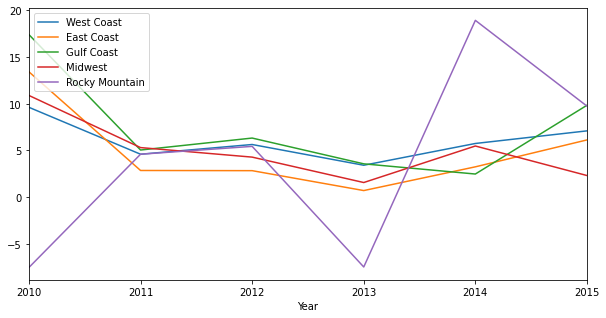

In [65]:
sum_df.plot(kind="line",figsize=(10,5))
plt.legend(loc="upper left")
plt.savefig(f"ttest_png/{language}.png")
plt.show()

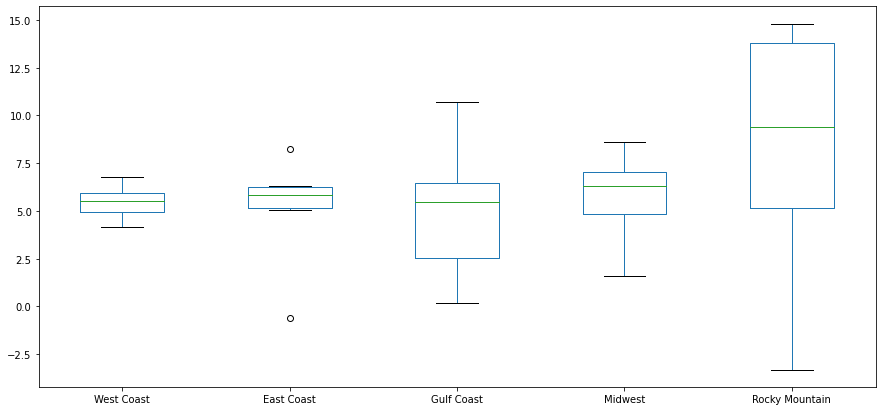

In [53]:
sum_df.plot(kind="box",figsize=(15,7))
plt.savefig(f"ttest_png/{language}_boxplot.png")


In [54]:
ret = stats.f_oneway(west, east, rocky, gulf, midw)
ret

F_onewayResult(statistic=0.6687666350014179, pvalue=0.619711345009146)

In [55]:
ret1 = stats.ttest_ind(west,east,equal_var=False)
ret1

Ttest_indResult(statistic=0.2803119544595328, pvalue=0.788709433053348)

In [56]:
ret2 = stats.ttest_ind(gulf,rocky,equal_var=False)
ret2

Ttest_indResult(statistic=-0.9865899081947511, pvalue=0.3540181973435302)

In [57]:
ret2 = stats.ttest_ind(west,rocky,equal_var=False)
ret2

Ttest_indResult(statistic=-0.9612309376356473, pvalue=0.379139495914242)

In [58]:
ret2 = stats.ttest_ind(gulf,midw,equal_var=False)
ret2

Ttest_indResult(statistic=-0.39054877685762973, pvalue=0.7055971376884892)